# Object-Recognition-CIFAR-10-CNN-Keras

# [Please star/upvote if u like it.]

## CONTENTS:

#### 1 ) Importing Various Modules

#### 2 ) Loading the Training and Validation Set

#### 3 ) Preparing the Data

####  4 ) Modelling

####  5 ) Making Predictions on the Validation Set

####  6 ) Evaluating the Model Performance

#### 7 ) Saving Submissions to a CSV file

## 1 ) Importing Various Modules

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 

import tensorflow as tf
import random as rn

# for loading the CIFAR-10 dataset.
from keras.datasets import cifar10


Using TensorFlow backend.


## 2 ) Loading the Training and Validation Set

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
# x_train

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

The training set has 50000 images of 32*32 piels each while the validation set has 10000 images of same pixel values.

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape  

(10000, 1)

The target variable has only one columns which we shall one hot encode further for feeding into a CNN.

In [9]:
print(np.unique(y_train)) 

[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(np.unique(y_test))  

[0 1 2 3 4 5 6 7 8 9]


We have 10 classes one for each class of object including airplane , ship etc... .

## 3 ) Preparing the Data

## 3.1 ) One Hot Encoding the Target

In [0]:
y_train=to_categorical(y_train)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test=to_categorical(y_test)

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## 3.2 ) Normalizing the Features

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
#x_train

## 3.3 ) Setting the Random Seeds

In [0]:
np.random.seed(42)

In [0]:
rn.seed(42)

In [0]:
tf.set_random_seed(42)

## 3.4 ) Visualizing Some Object Images

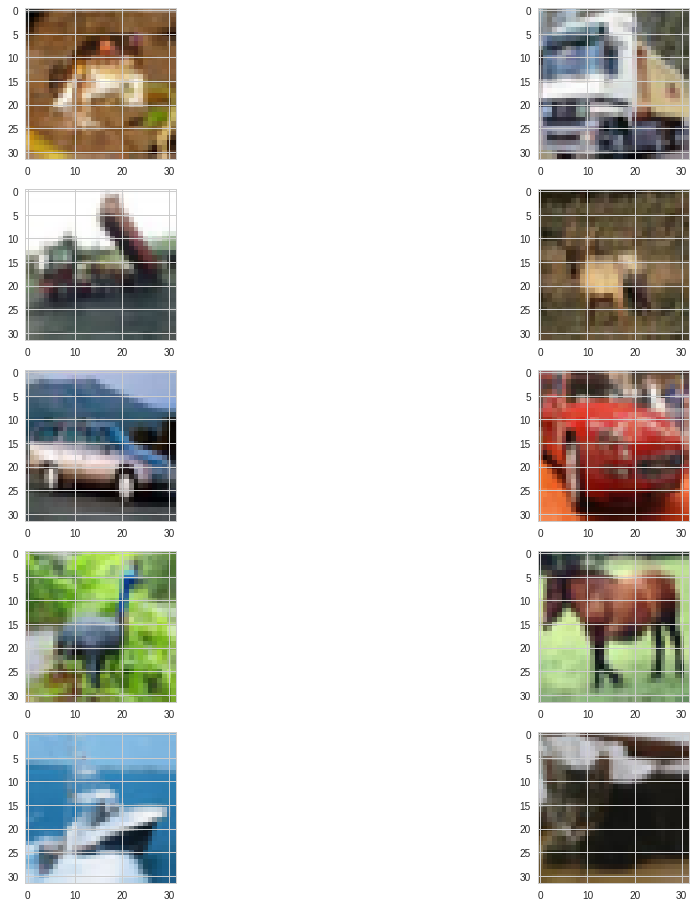

In [20]:
# visulaizing the images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
count=0
for i in range(5):
    for j in range (2):
        ax[i,j].imshow(x_train[count])
        count+=1

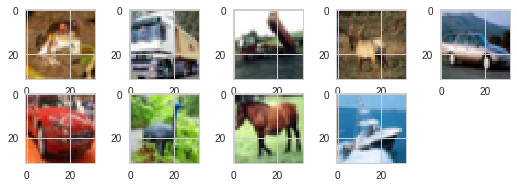

In [21]:
from scipy.misc import toimage
for i in range(0, 9):
    plt.subplot(450 + 1 + i)
    plt.imshow(toimage(x_train[i]))
plt.show()


## 4 ) Modelling

## 4.1 ) Building a Convolutional Neural Network using Keras

In [0]:
# modelling starts using a CNN.

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu',
                 input_shape=(32,32,3)))
model.add(BatchNormalization())
 
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format="channels_last"))
 
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format="channels_last"))
 

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format="channels_last"))
 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [0]:
batch_size=64
epochs=20

## 4.2 ) Data Augmentation Using the Image Generator from Keras¶

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 4.3 ) Compiling the Keras Model

In [0]:
model.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

## 4.4 ) Summary of the Model

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
__________

## 4.5 ) Fitting the model on the training data and testing on the validation set¶

In [27]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
781/781 [==============================] - 52s 67ms/step - loss: 1.3613 - acc: 0.5293 - val_loss: 1.2143 - val_acc: 0.5970
Epoch 2/20
781/781 [==============================] - 51s 65ms/step - loss: 0.9032 - acc: 0.6845 - val_loss: 0.9948 - val_acc: 0.6755
Epoch 3/20
781/781 [==============================] - 51s 65ms/step - loss: 0.7415 - acc: 0.7419 - val_loss: 0.6520 - val_acc: 0.7831
Epoch 4/20
781/781 [==============================] - 51s 65ms/step - loss: 0.6582 - acc: 0.7718 - val_loss: 0.8791 - val_acc: 0.7076
Epoch 5/20
781/781 [==============================] - 50s 64ms/step - loss: 0.5983 - acc: 0.7940 - val_loss: 0.8033 - val_acc: 0.7496
Epoch 6/20
781/781 [==============================] - 50s 65ms/step - loss: 0.5503 - acc: 0.8096 - val_loss: 0.5924 - val_acc: 0.8078
Epoch 7/20
781/781 [==============================] - 50s 64ms/step - loss: 0.5143 - acc: 0.8230 - val_loss: 0.6542 - val_acc: 0.7866
Epoch 8/20
781/781 [==============================] - 49s 63ms

## 5 ) Making Predictions on the Validation Set

In [2]:
pred=model.predict(x_test)
pred_object=np.argmax(pred,axis=1)
image_id=[]
for i in range (len(pred_object)):
    image_id.append(i+1)
len(image_id)

In [29]:
pred_object

array([3, 8, 8, ..., 5, 1, 7])

## 6 ) Evaluating the Model Performance

In [30]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 306us/step


[0.5183620254516601, 0.8541]

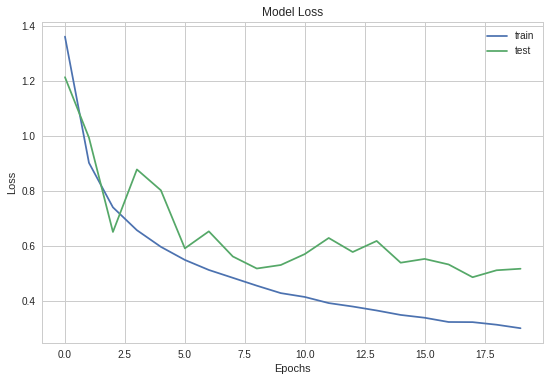

In [31]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


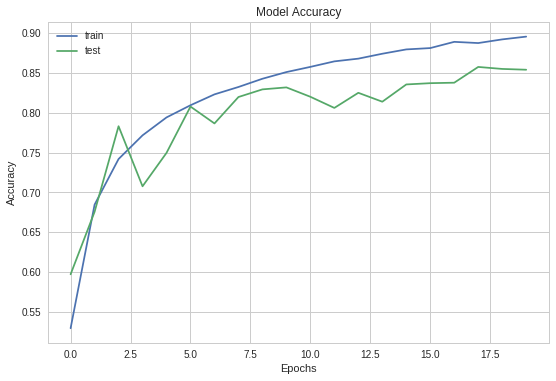

In [32]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## 7 ) Saving Submissions to a CSV file

In [0]:
d={'ImageId':image_id,'Label':pred_object}
answer=pd.DataFrame(d)
answer.to_csv('predictions.csv',index=False)

In [0]:
# from google.colab import files
# files.download('predictions.csv')